In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EXTRACTED_FEATURES_FILE = 'extracted_features_iemocap.csv'
plt.rcParams['figure.dpi'] = 300

## Data Study

In [2]:
df = pd.read_csv(EXTRACTED_FEATURES_FILE)
print(f"Number of Audio Files: {df.shape[0]}")
df = df.sort_values(['Emotion_Id', 'Gender'], ascending = (True, True))
df = df.set_index('File')
df

Number of Audio Files: 10039


Interaction  Gender  Duration Emotion  Emotion_Id  \
File                                                                       
Ses01F_impro01_F012     improvised  Female     2.750   angry           0   
Ses01F_impro04_F028     improvised  Female     2.010   angry           0   
Ses01F_impro04_F029     improvised  Female     3.160   angry           0   
Ses01F_impro04_F030     improvised  Female     3.185   angry           0   
Ses01F_impro04_F031     improvised  Female     4.400   angry           0   
...                            ...     ...       ...     ...         ...   
Ses05M_script03_2_M013    scripted    Male     9.340   other          10   
Ses05M_script03_2_M014    scripted    Male     4.150   other          10   
Ses05M_script03_2_M018    scripted    Male     2.170   other          10   
Ses05M_script03_2_M019    scripted    Male     1.180   other          10   
Ses05M_script03_2_M021    scripted    Male     2.400   other          10   

                        Valence  Activation  Dominance  std_chroma_stft  \
File                                                                      
Ses01F_impro01_F012         2.0         3.5        3.5         0.296270   
Ses01F_impro04_F028         2.0         3.5        3.5         0.319851   
Ses01F_impro04_F029         1.5         4.0        4.0         0.298296   
Ses01F_impro04_F030         1.5         3.5        4.0         0.316109   
Ses01F_impro04_F031         1.5         3.0        3.5         0.314387   
...                         ...         ...        ...              ...   
Ses05M_script03_2_M013      2.0         3.5        4.0         0.314951   
Ses05M_script03_2_M014      1.5         3.5        4.0         0.315053   
Ses05M_script03_2_M018      3.5         3.0        3.0         0.302163   
Ses05M_script03_2_M019      2.5         3.0        3.5         0.310805   
Ses05M_script03_2_M021      2.0         3.5        4.0         0.320674   

                        mean_zcr  ...  max_mfcc6  min_mfcc7   var_mfcc9  \
File                              ...                                     
Ses01F_impro01_F012     0.082856  ...  39.327560 -40.651329   42.375973   
Ses01F_impro04_F028     0.086560  ...  62.818893 -40.228039   84.092949   
Ses01F_impro04_F029     0.085880  ...  29.858166 -33.455795  164.847565   
Ses01F_impro04_F030     0.106300  ...  48.537384 -38.774422  178.178299   
Ses01F_impro04_F031     0.065918  ...  44.125771 -49.090309  100.364433   
...                          ...  ...        ...        ...         ...   
Ses05M_script03_2_M013  0.063627  ...  58.600712 -46.007534  113.818436   
Ses05M_script03_2_M014  0.067145  ...  73.493271 -54.896301  162.575638   
Ses05M_script03_2_M018  0.062219  ...  51.708046 -34.321487  181.688660   
Ses05M_script03_2_M019  0.116048  ...  58.984211 -54.916523   73.387558   
Ses05M_script03_2_M021  0.120333  ...  68.866486 -47.562469  194.224579   

                        max_mfcc9  max_mfcc10  max_mfcc13  var_mfcc14  \
File                                                                    
Ses01F_impro01_F012     19.492970   19.512123   18.821735   47.666279   
Ses01F_impro04_F028     24.274593   11.059961   36.497154   29.247034   
Ses01F_impro04_F029     34.833263   22.882631   33.635147  118.356186   
Ses01F_impro04_F030     24.138340   11.319570   35.046803  183.465393   
Ses01F_impro04_F031     35.686844   29.594337   11.990172   68.253944   
...                           ...         ...         ...         ...   
Ses05M_script03_2_M013  32.636822   28.463696   25.335880   78.160225   
Ses05M_script03_2_M014  31.630028   12.225033   33.560890   87.977707   
Ses05M_script03_2_M018  23.869041   14.644627   14.957552   41.870499   
Ses05M_script03_2_M019  23.126339   13.553119   24.739117   51.918839   
Ses05M_script03_2_M021  23.398148   23.116982   20.446377   71.395477   

                        var_mfcc15  min_mfcc17  min_mfcc19  
File                                                        
Ses01F_imp

## Using the data in SOA

In [3]:
df = df[df['Emotion'].isin({'angry', 'neutral', 'sad', 'happy', 'excited'})]
df.loc[df['Emotion'] == 'excited', 'Emotion'] = 'happy'
df.loc[df['Emotion_Id'] == 5, 'Emotion_Id'] = 1
df.groupby(['Emotion', 'Emotion_Id']).agg({'Emotion': ['count']})

Emotion
                     count
Emotion Emotion_Id        
angry   0             1103
happy   1             1636
neutral 3             1708
sad     2             1084

In [6]:
df.groupby(['Gender']).agg({'Gender': ['count']})

Gender
        count
Gender       
Female   2649
Male     2882

## Audio Clip Durations

In [7]:
df.groupby(['Emotion']).agg({'Duration': ['mean']})

Duration
             mean
Emotion          
angry    4.512970
happy    4.621055
neutral  3.901985
sad      5.496464

In [8]:
df[["Duration"]].min()

Duration    0.585
dtype: float64

In [9]:
df[["Duration"]].mean()

Duration    4.549016
dtype: float64

In [10]:
df[["Duration"]].max()

Duration    34.1388
dtype: float64

## Improvised vs Scripted Data

In [11]:
df.groupby(['Interaction']).agg({'Interaction': ['count']})

Interaction
                  count
Interaction            
improvised         2943
scripted           2588

In [12]:
df.groupby(['Emotion', 'Interaction']).agg({'Emotion': ['count']})

Emotion
                      count
Emotion Interaction        
angry   improvised      289
        scripted        814
happy   improvised      947
        scripted        689
neutral improvised     1099
        scripted        609
sad     improvised      608
        scripted        476

### Valence Variation for each Emotion Label

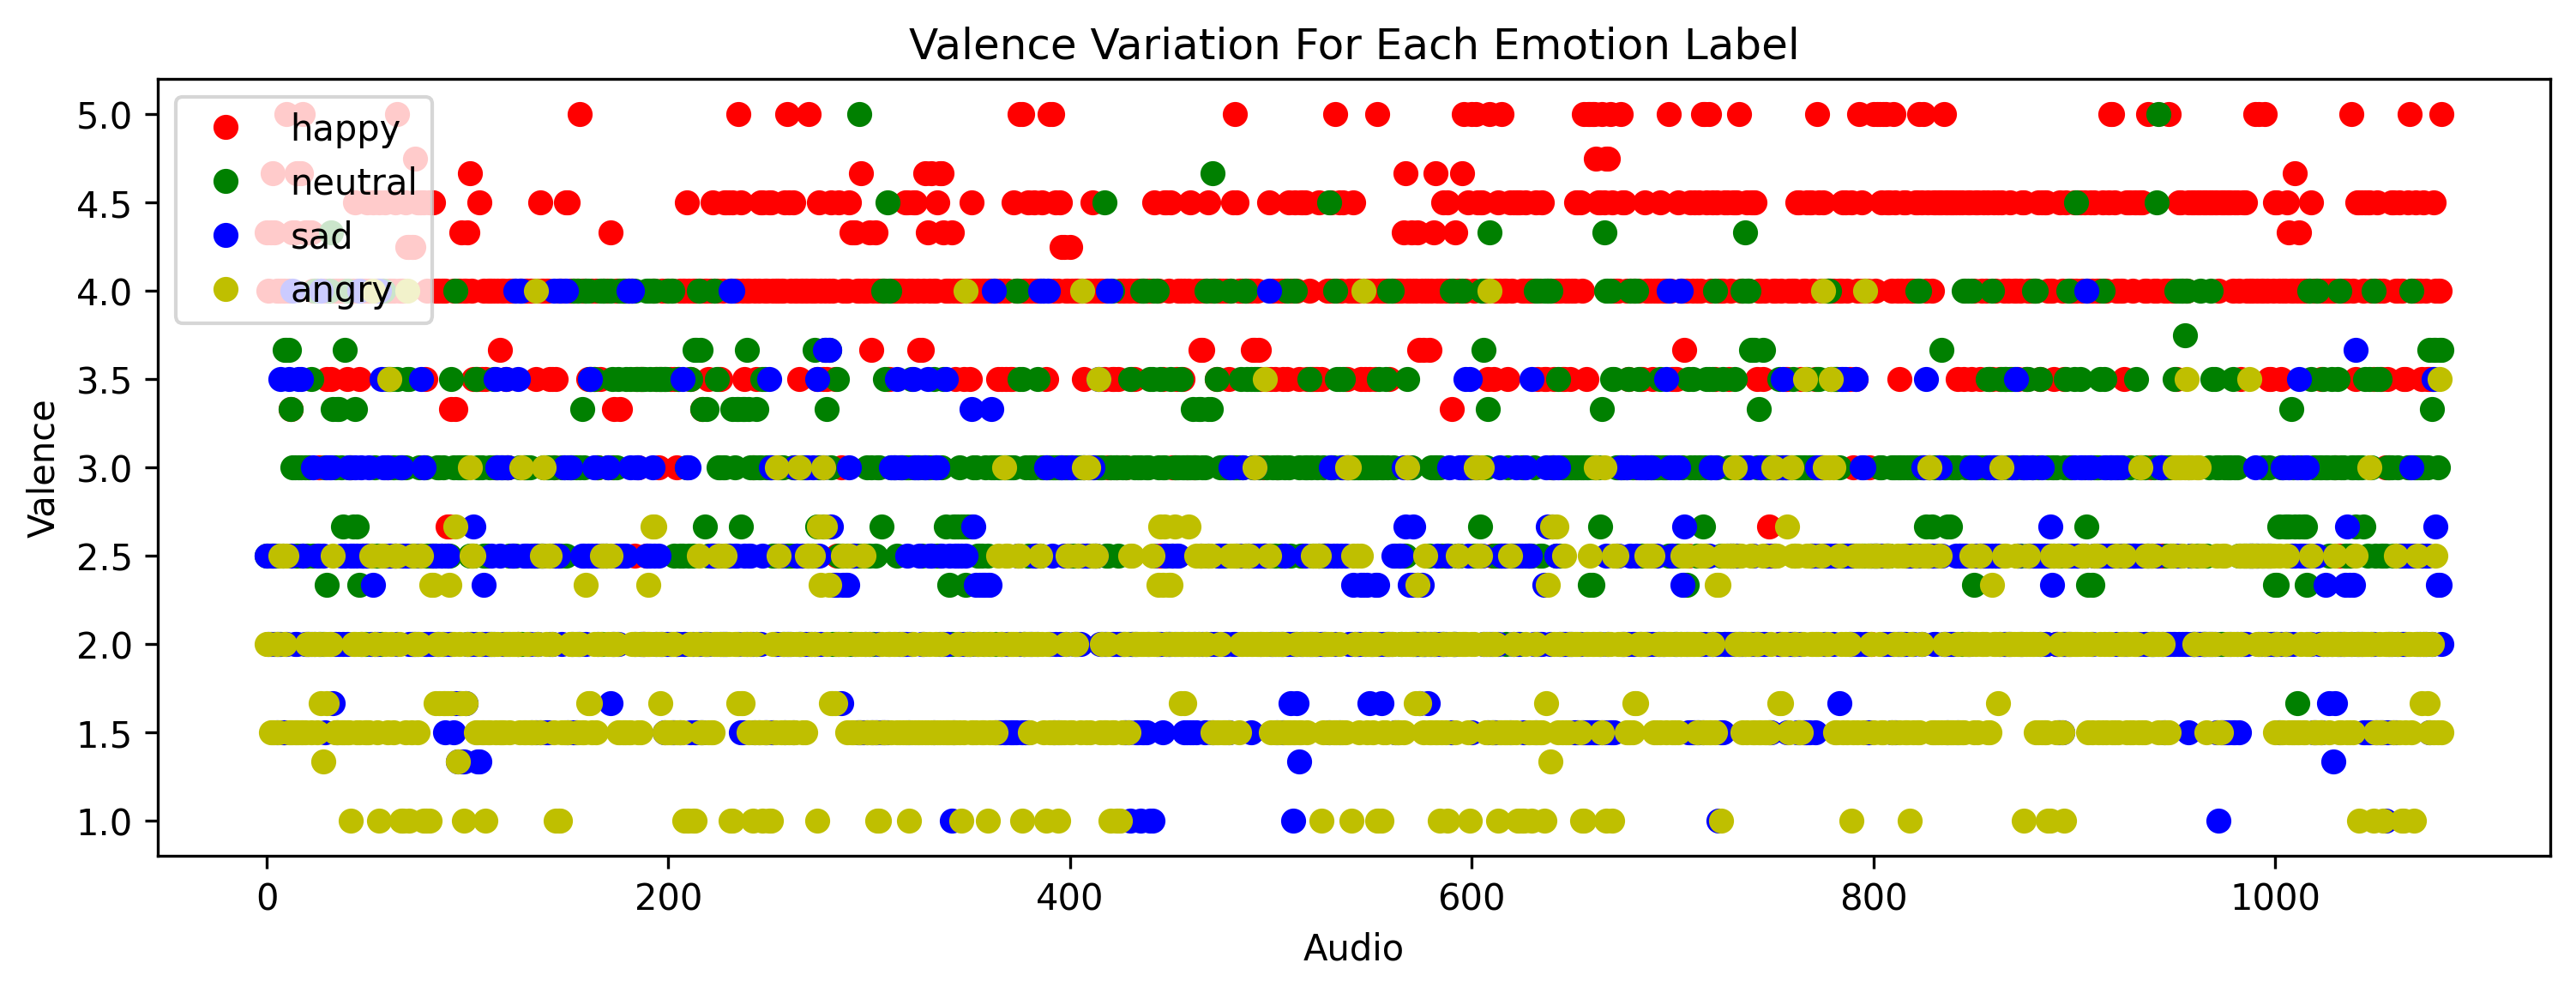

In [5]:
plt.figure(figsize=(12,4))
plt.title("Valence Variation For Each Emotion Label")
plt.xlabel("Audio")
plt.ylabel("Valence")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'happy']['Valence'][:1084], 'ro', label="happy")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'neutral']['Valence'][:1084], 'go', label="neutral")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'sad']['Valence'][:1084], 'bo', label="sad")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'angry']['Valence'][:1084], 'yo', label="angry")
plt.legend(loc="upper left")
plt.show()

### Activation Variation for each Emotion Label

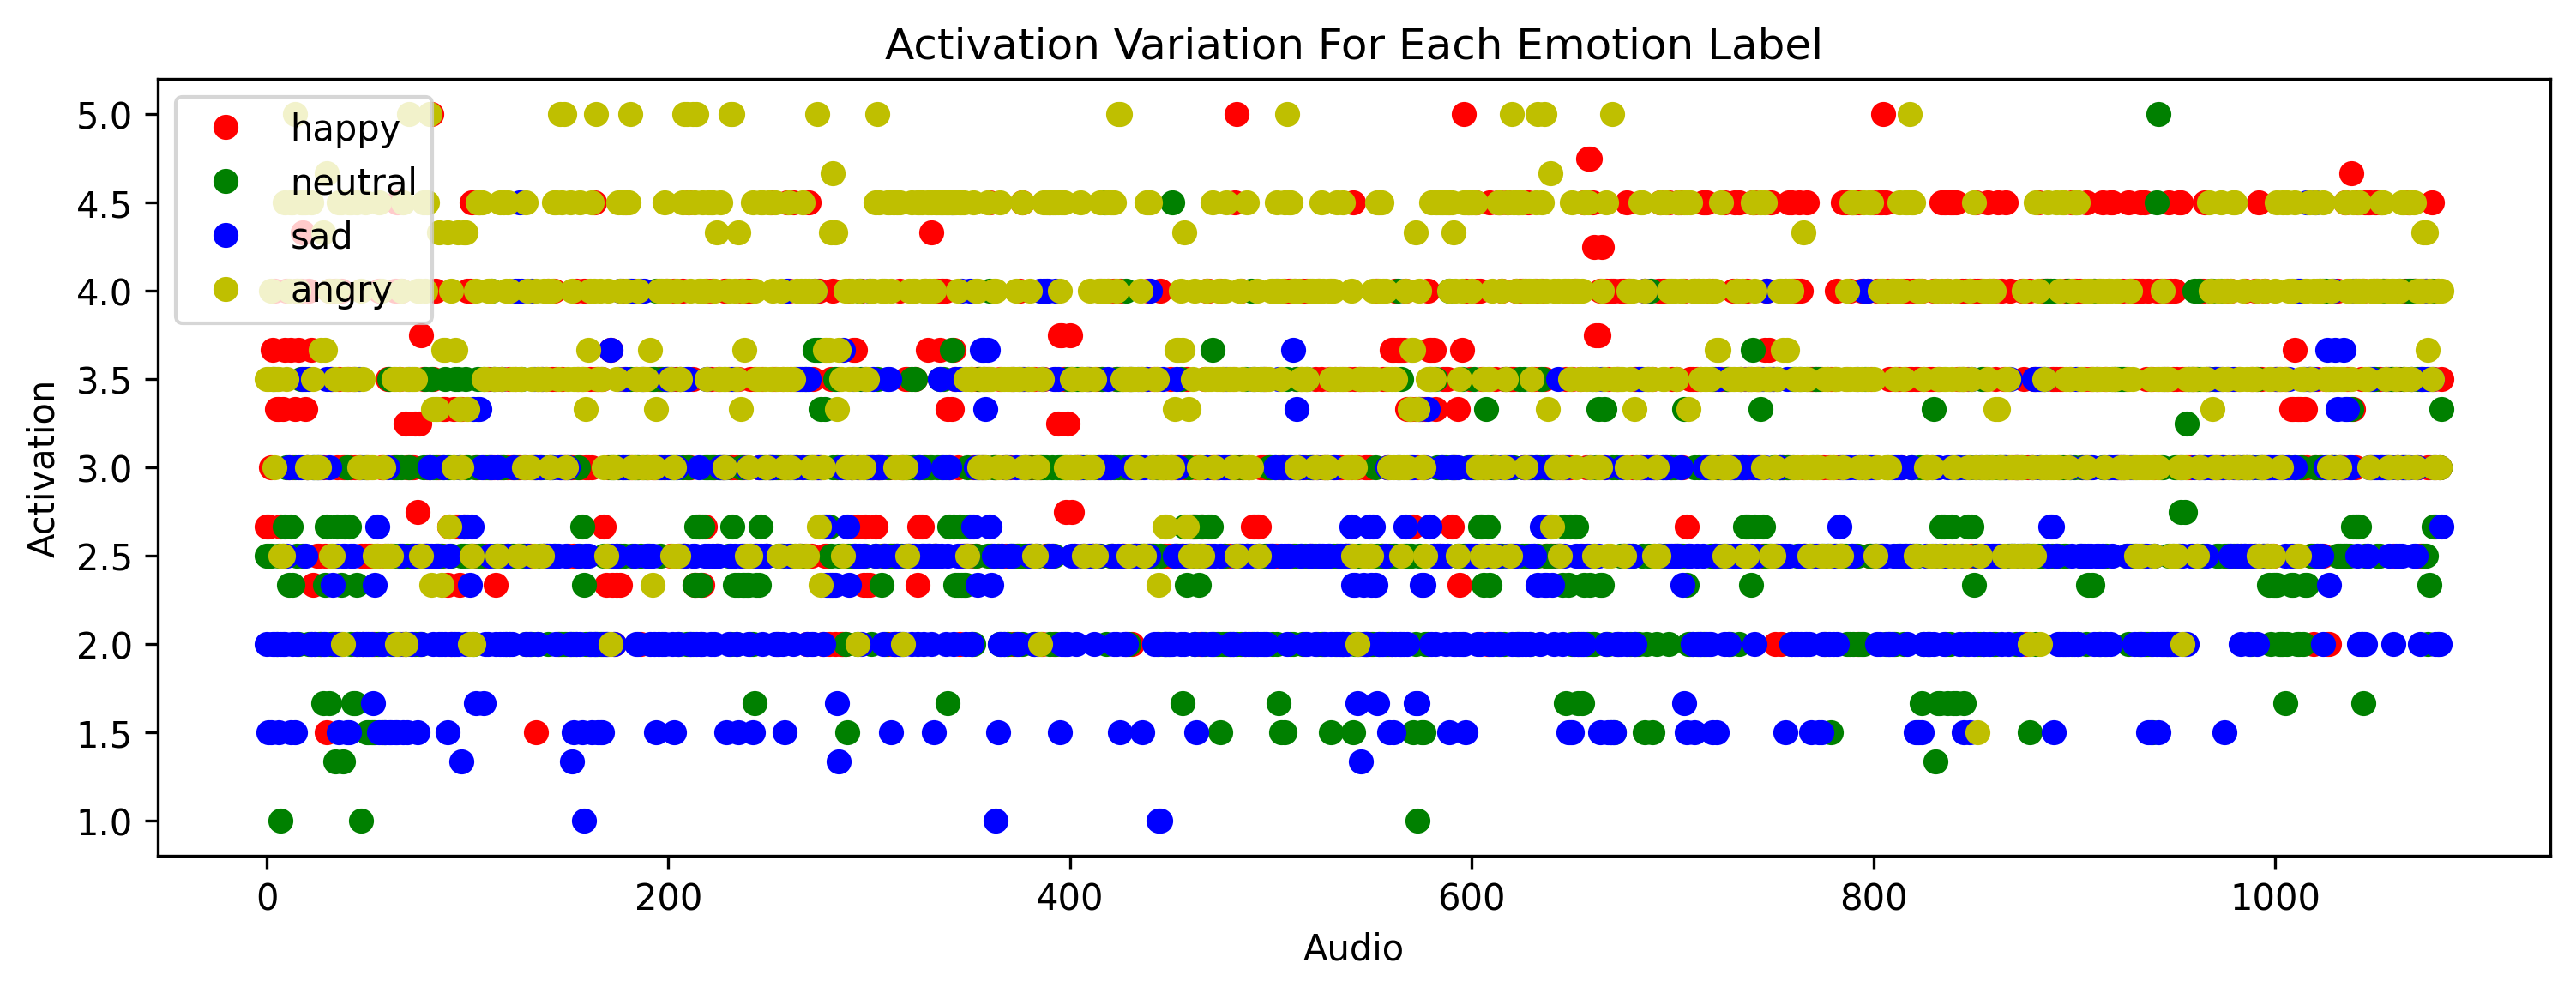

In [6]:
plt.figure(figsize=(12,4))
plt.title("Activation Variation For Each Emotion Label")
plt.xlabel("Audio")
plt.ylabel("Activation")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'happy']['Activation'][:1084], 'ro', label="happy")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'neutral']['Activation'][:1084], 'go', label="neutral")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'sad']['Activation'][:1084], 'bo', label="sad")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'angry']['Activation'][:1084], 'yo', label="angry")
plt.legend(loc="upper left")
plt.show()

### Dominance Variation for each Emotion Label

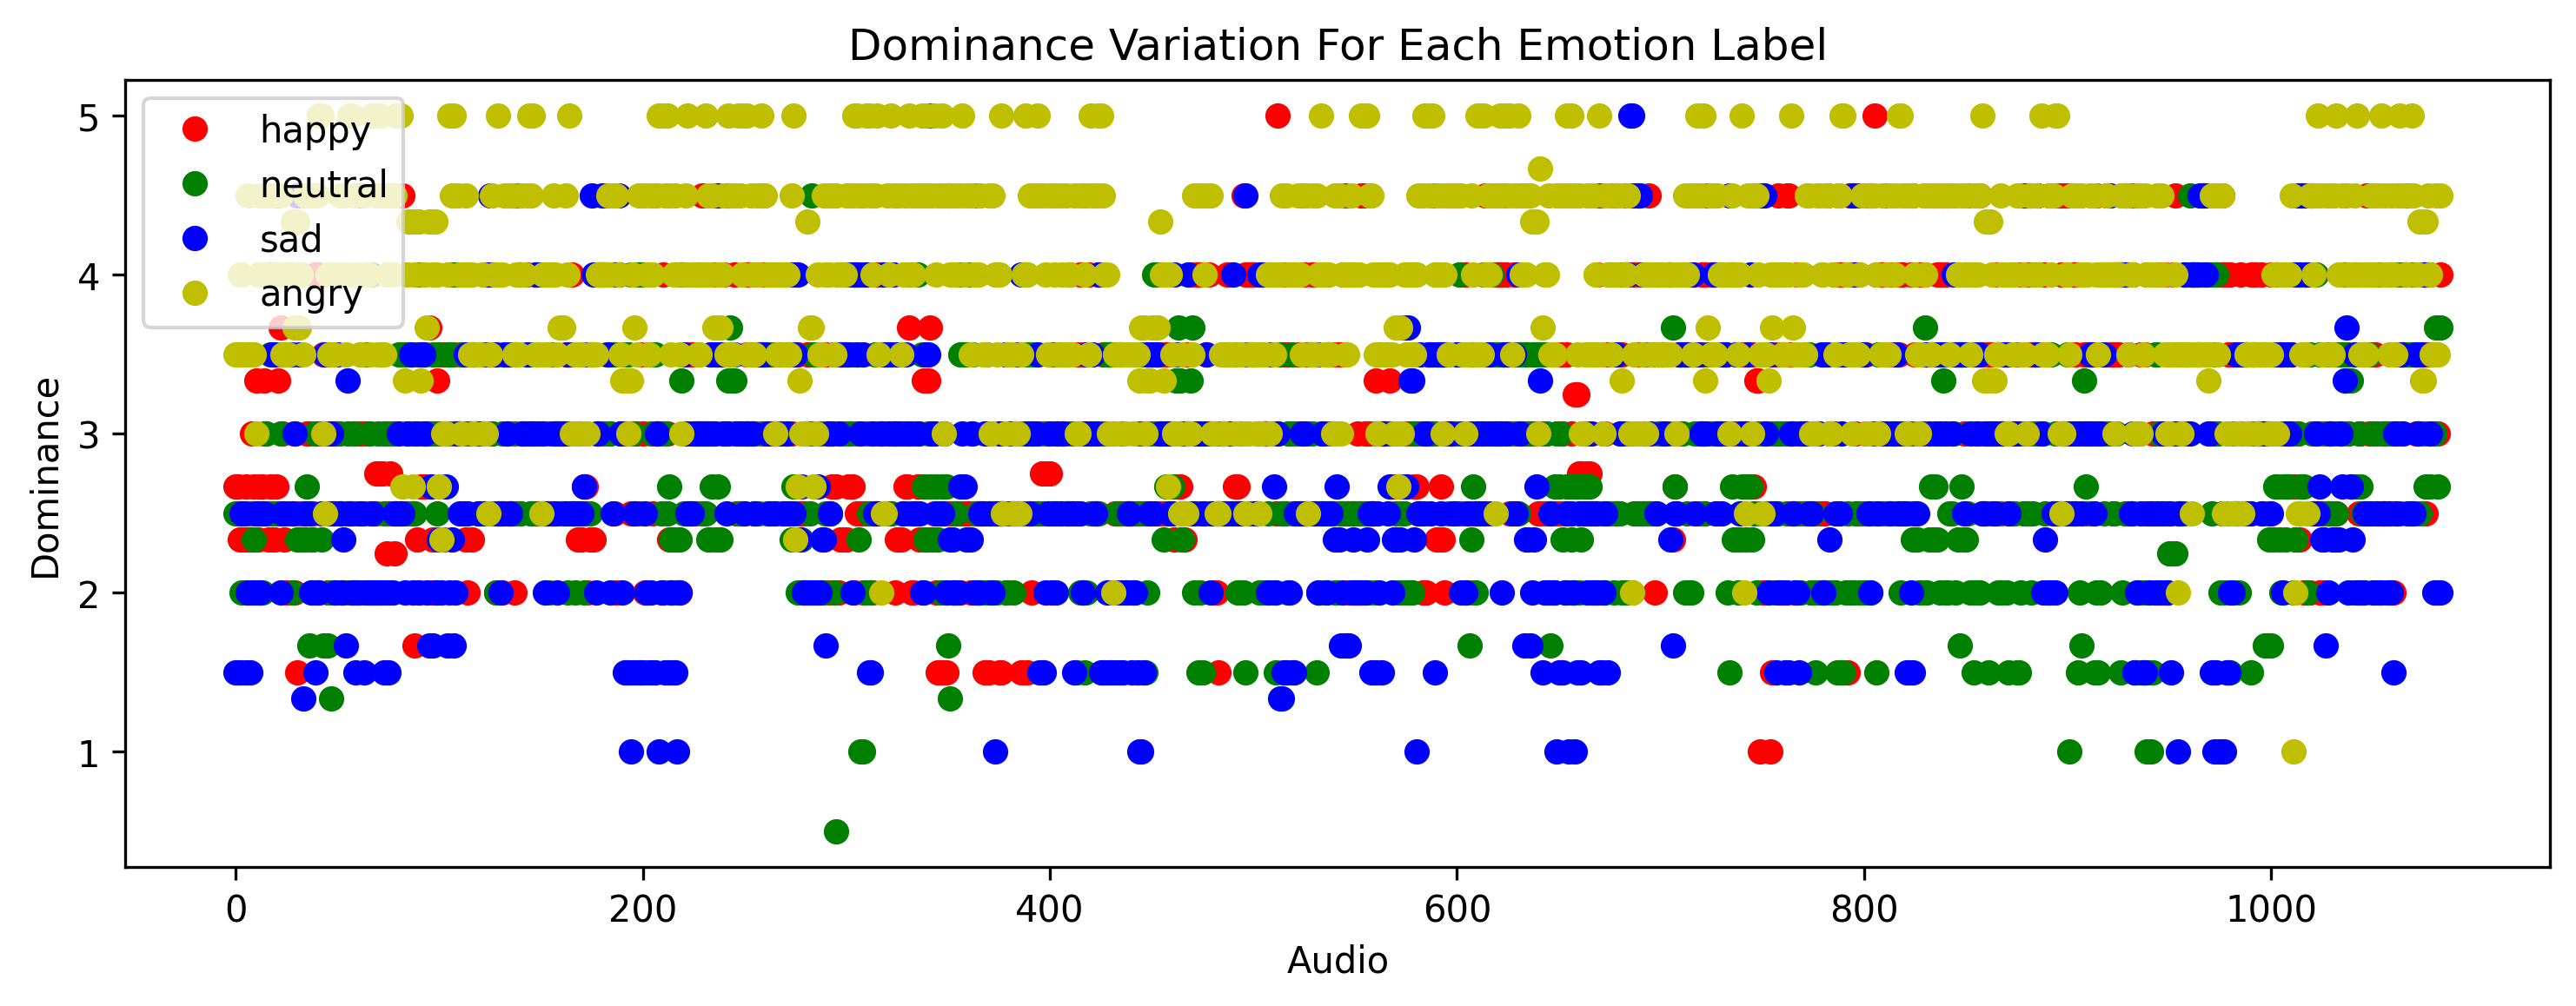

In [7]:
plt.figure(figsize=(12,4))
plt.title("Dominance Variation For Each Emotion Label")
plt.xlabel("Audio")
plt.ylabel("Dominance")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'happy']['Dominance'][:1084], 'ro', label="happy")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'neutral']['Dominance'][:1084], 'go', label="neutral")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'sad']['Dominance'][:1084], 'bo', label="sad")
plt.plot([i for i in range(1084)], df.loc[df['Emotion'] == 'angry']['Dominance'][:1084], 'yo', label="angry")
plt.legend(loc="upper left")
plt.show()

## Improvised vs Scripted Data

In [8]:
df_improv = df[df['Interaction'] == 'improvised']
df_improv.groupby(['Emotion']).agg({'Emotion': ['count']})

Emotion
          count
Emotion        
angry       289
happy       947
neutral    1099
sad         608

In [14]:
def labels_variations(emotions):
    df_improv = df[df['Interaction'] == 'improvised']
    df_scripted = df[df['Interaction'] == 'scripted']

    def scatter_plot(pos_x, pos_y, title, ylabel, df, bar_plot_data = [[], []]):
        def get_min_len(emotion):
            x = len(df_improv.loc[df_improv['Emotion'] == emotion][ylabel])
            y = len(df_scripted.loc[df_scripted['Emotion'] == emotion][ylabel])
            return x if x < y else y

        def plot(emotion, color):
            if emotion in emotions:
                data = df.loc[df['Emotion'] == emotion][ylabel][:get_min_len(emotion)]
                bar_plot_data[0].append(emotion)
                bar_plot_data[1].append(data.values)
                ax.plot([i for i in range(len(data))], data, color, label=f"{emotion} - max: {np.max(data)}, mean: {np.mean(data):.1f}, min: {np.min(data)}")
        
        ax = plt.subplot(grid[pos_x, pos_y])
        ax.set_title(title)
        ax.set(xlabel="Audio", ylabel=ylabel)

        plot('happy', 'ro')
        plot('neutral', 'go')
        plot('sad', 'bo')
        plot('angry', 'yo')

        ax.set_yticks(yticks)
        ax.legend(loc="upper left")
        return bar_plot_data

    def violin_plot(pos_x, title, ylabel, bar_plot_data):
        ax = plt.subplot(grid[pos_x, :])
        ax.set_title(title)
        ax.set(xlabel="Audio", ylabel=ylabel)

        x = len(bar_plot_data[0])//2
        df_barplot = pd.DataFrame(
            zip(
                bar_plot_data[0]*x,
                ['Improvised']*x+['Scripted']*x,
                bar_plot_data[1]
            ),
            columns=["Emotion", "Acting Type", ylabel]
        )
        df_barplot = df_barplot.explode(ylabel)
        df_barplot[ylabel] = df_barplot[ylabel].astype('float')
        sns.violinplot(x="Emotion", y=ylabel, hue="Acting Type", inner='quartile',
            data=df_barplot, ax=ax, palette="Set3", split=True, scale="count")

        ax.set_yticks(yticks)
        ax.legend(loc="upper left")

    grid = plt.GridSpec(6, 2, wspace=.1, hspace=.4)
    plt.figure(figsize=(20, 30), tight_layout=True)
    
    if len(emotions) == 4:
        yticks = [float(i)/10.0 for i in range(0, 75, 5)]
    else:
        yticks = [float(i)/10.0 for i in range(0, 65, 5)]

    bar_plot_data = scatter_plot(0, 0, "Valence Variation on Improvised SOA Data", "Valence", df_improv)
    bar_plot_data = scatter_plot(0, 1, "Valence Variation on Scripted SOA Data", "Valence", df_scripted)
    violin_plot(1, "Valence Variation on All SOA Data", "Valence", bar_plot_data)
    bar_plot_data = scatter_plot(2, 0, "Activation Variation on Improvised SOA Data", "Activation", df_improv)
    bar_plot_data = scatter_plot(2, 1, "Activation Variation on Scripted SOA Data", "Activation", df_scripted)
    violin_plot(3, "Activation Variation on All SOA Data", "Activation", bar_plot_data)
    bar_plot_data = scatter_plot(4, 0, "Dominance Variation on Improvised SOA Data", "Dominance", df_improv)
    bar_plot_data = scatter_plot(4, 1, "Dominance Variation on Scripted SOA Data", "Dominance", df_scripted)
    violin_plot(5, "Dominance Variation on All SOA Data", "Dominance", bar_plot_data)
    plt.show()

C:\Users\Chico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


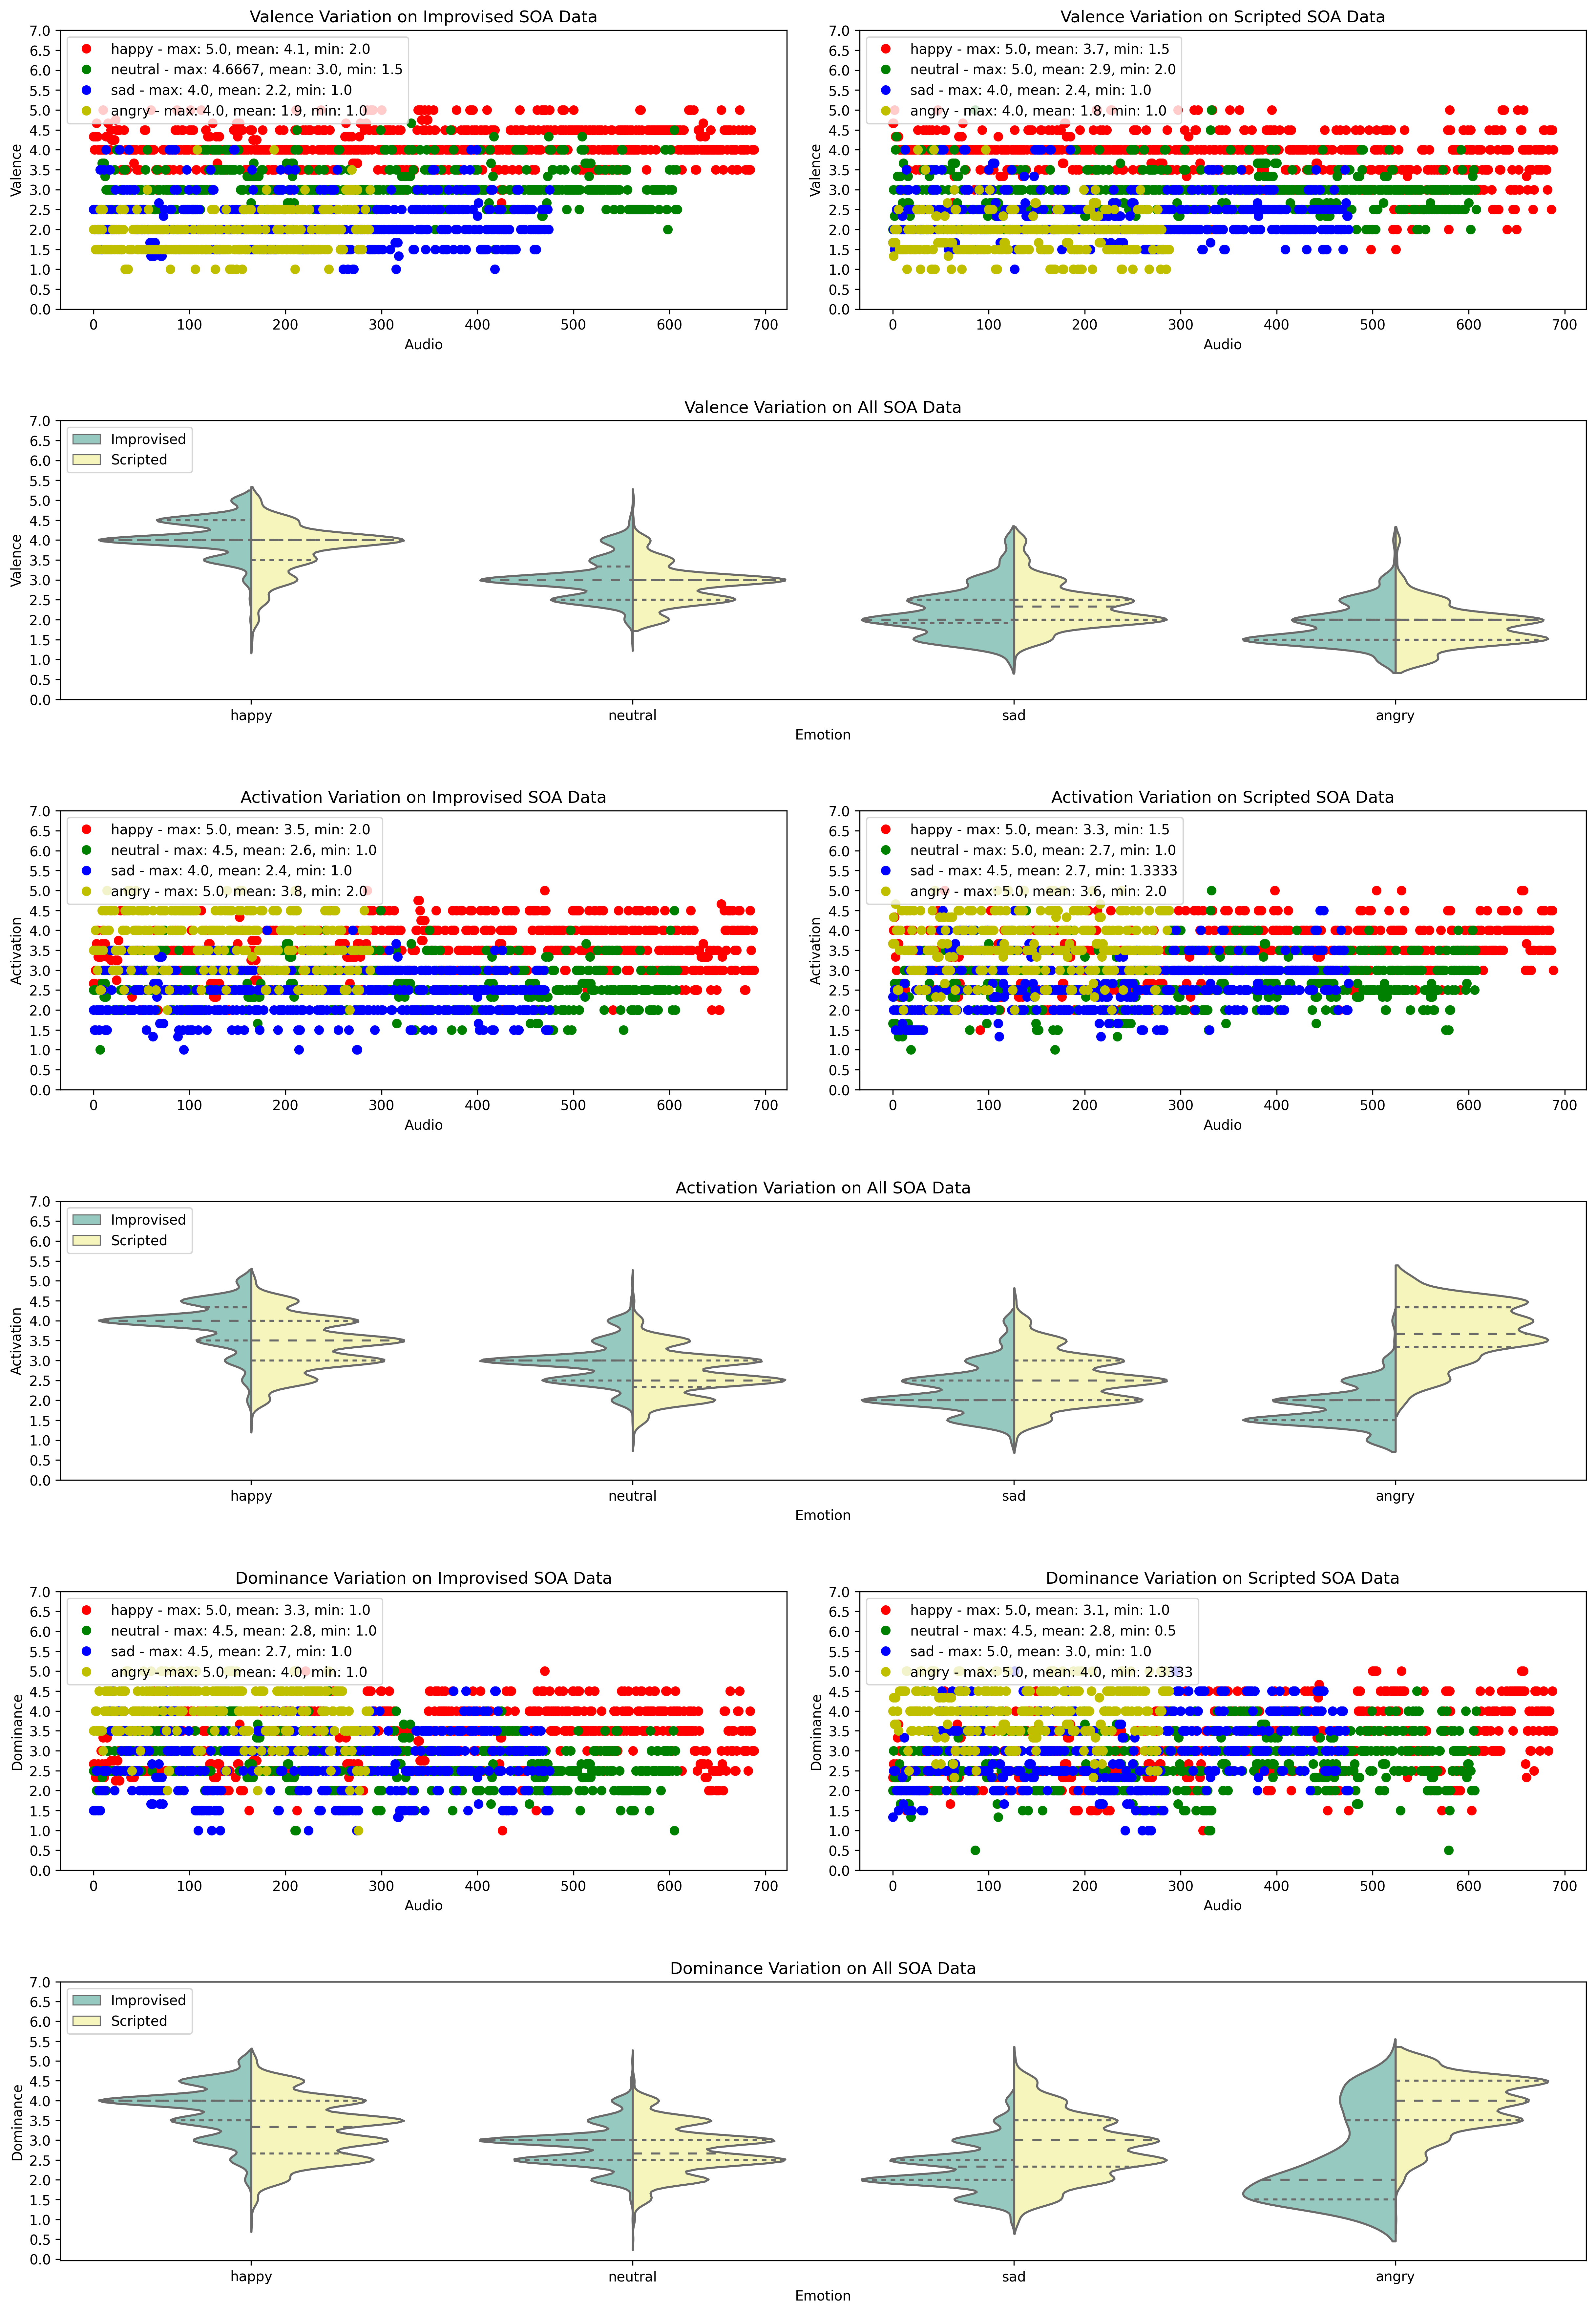

In [15]:
labels_variations(['happy', 'sad', 'angry', 'neutral'])

C:\Users\Chico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


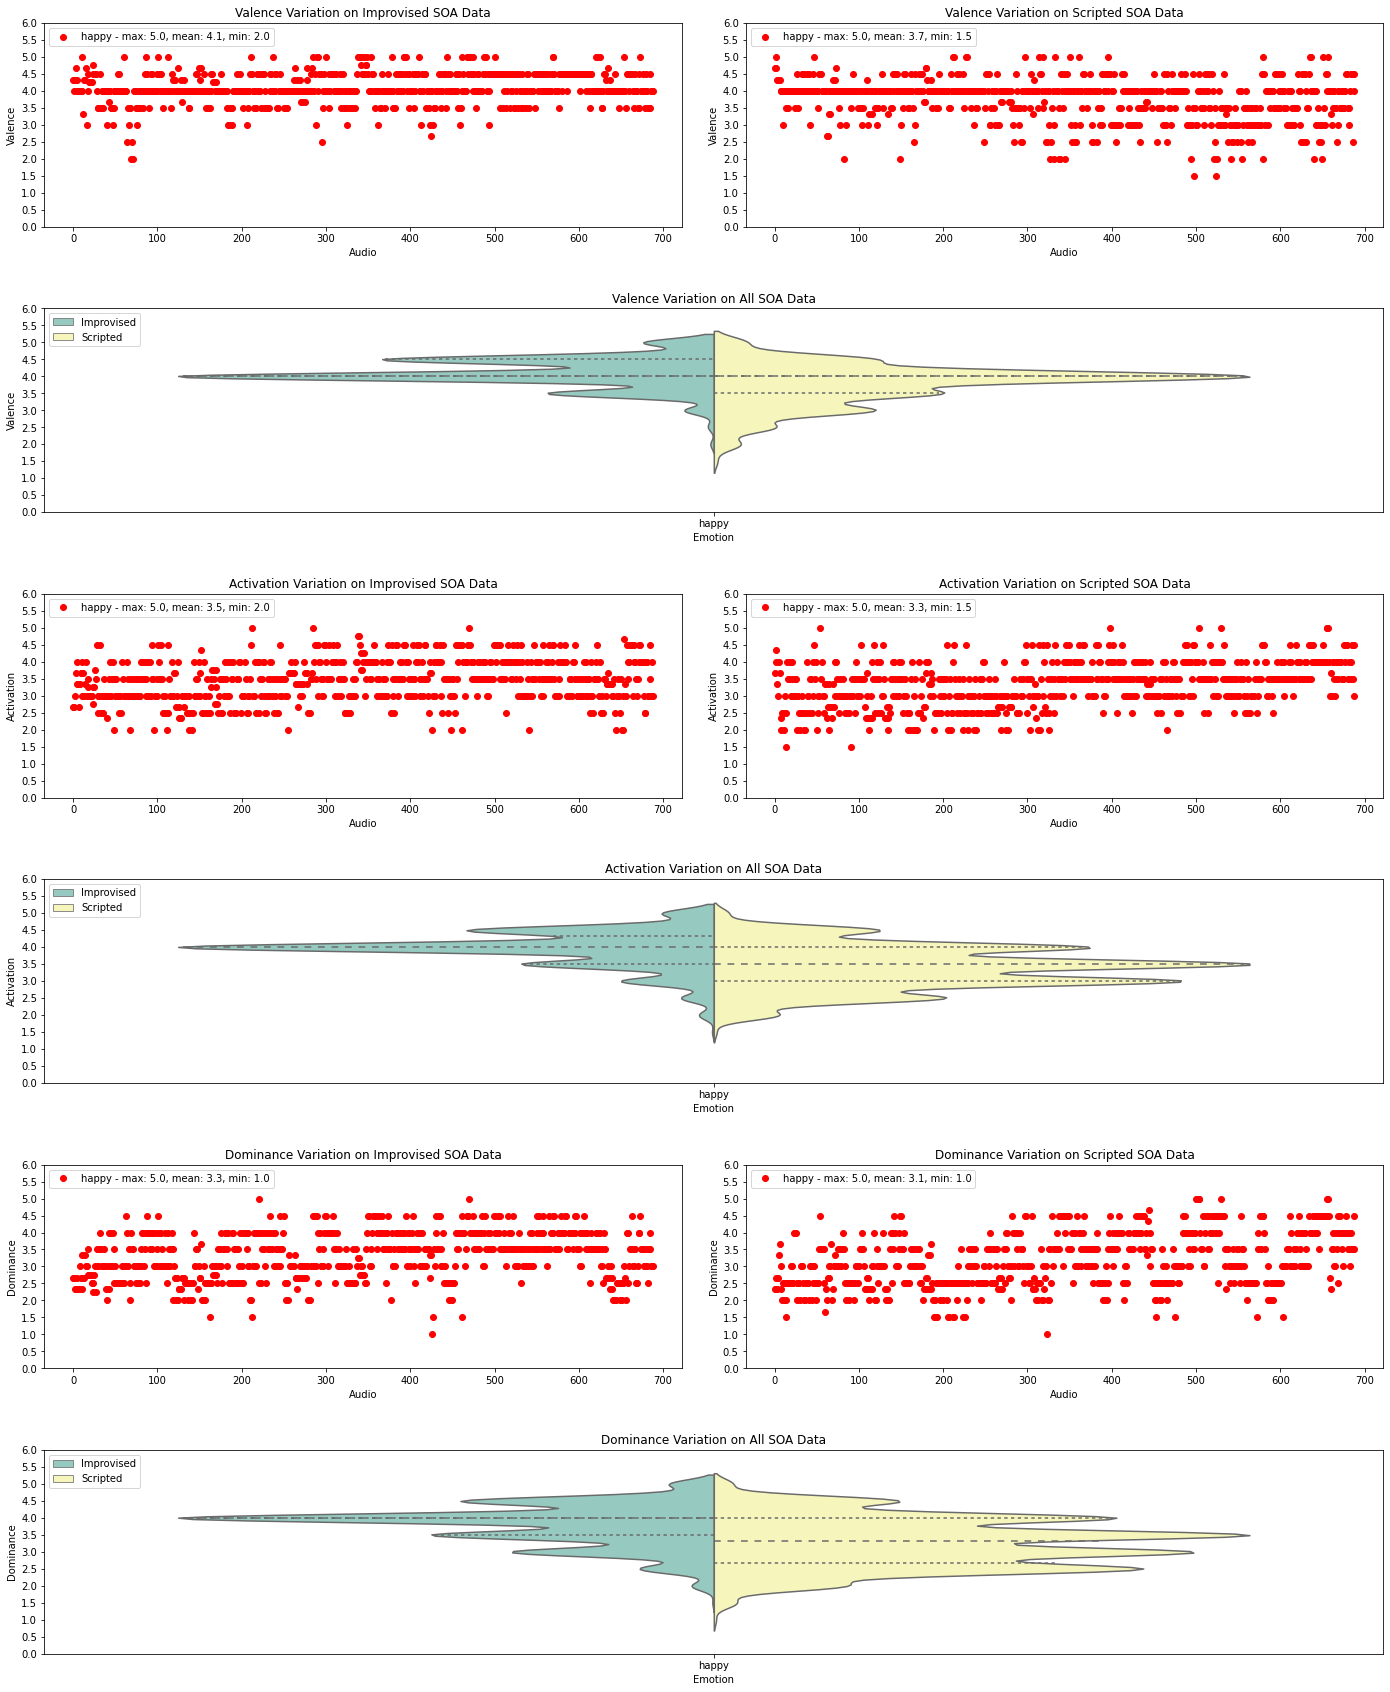

In [19]:
labels_variations(['happy'])

C:\Users\Chico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


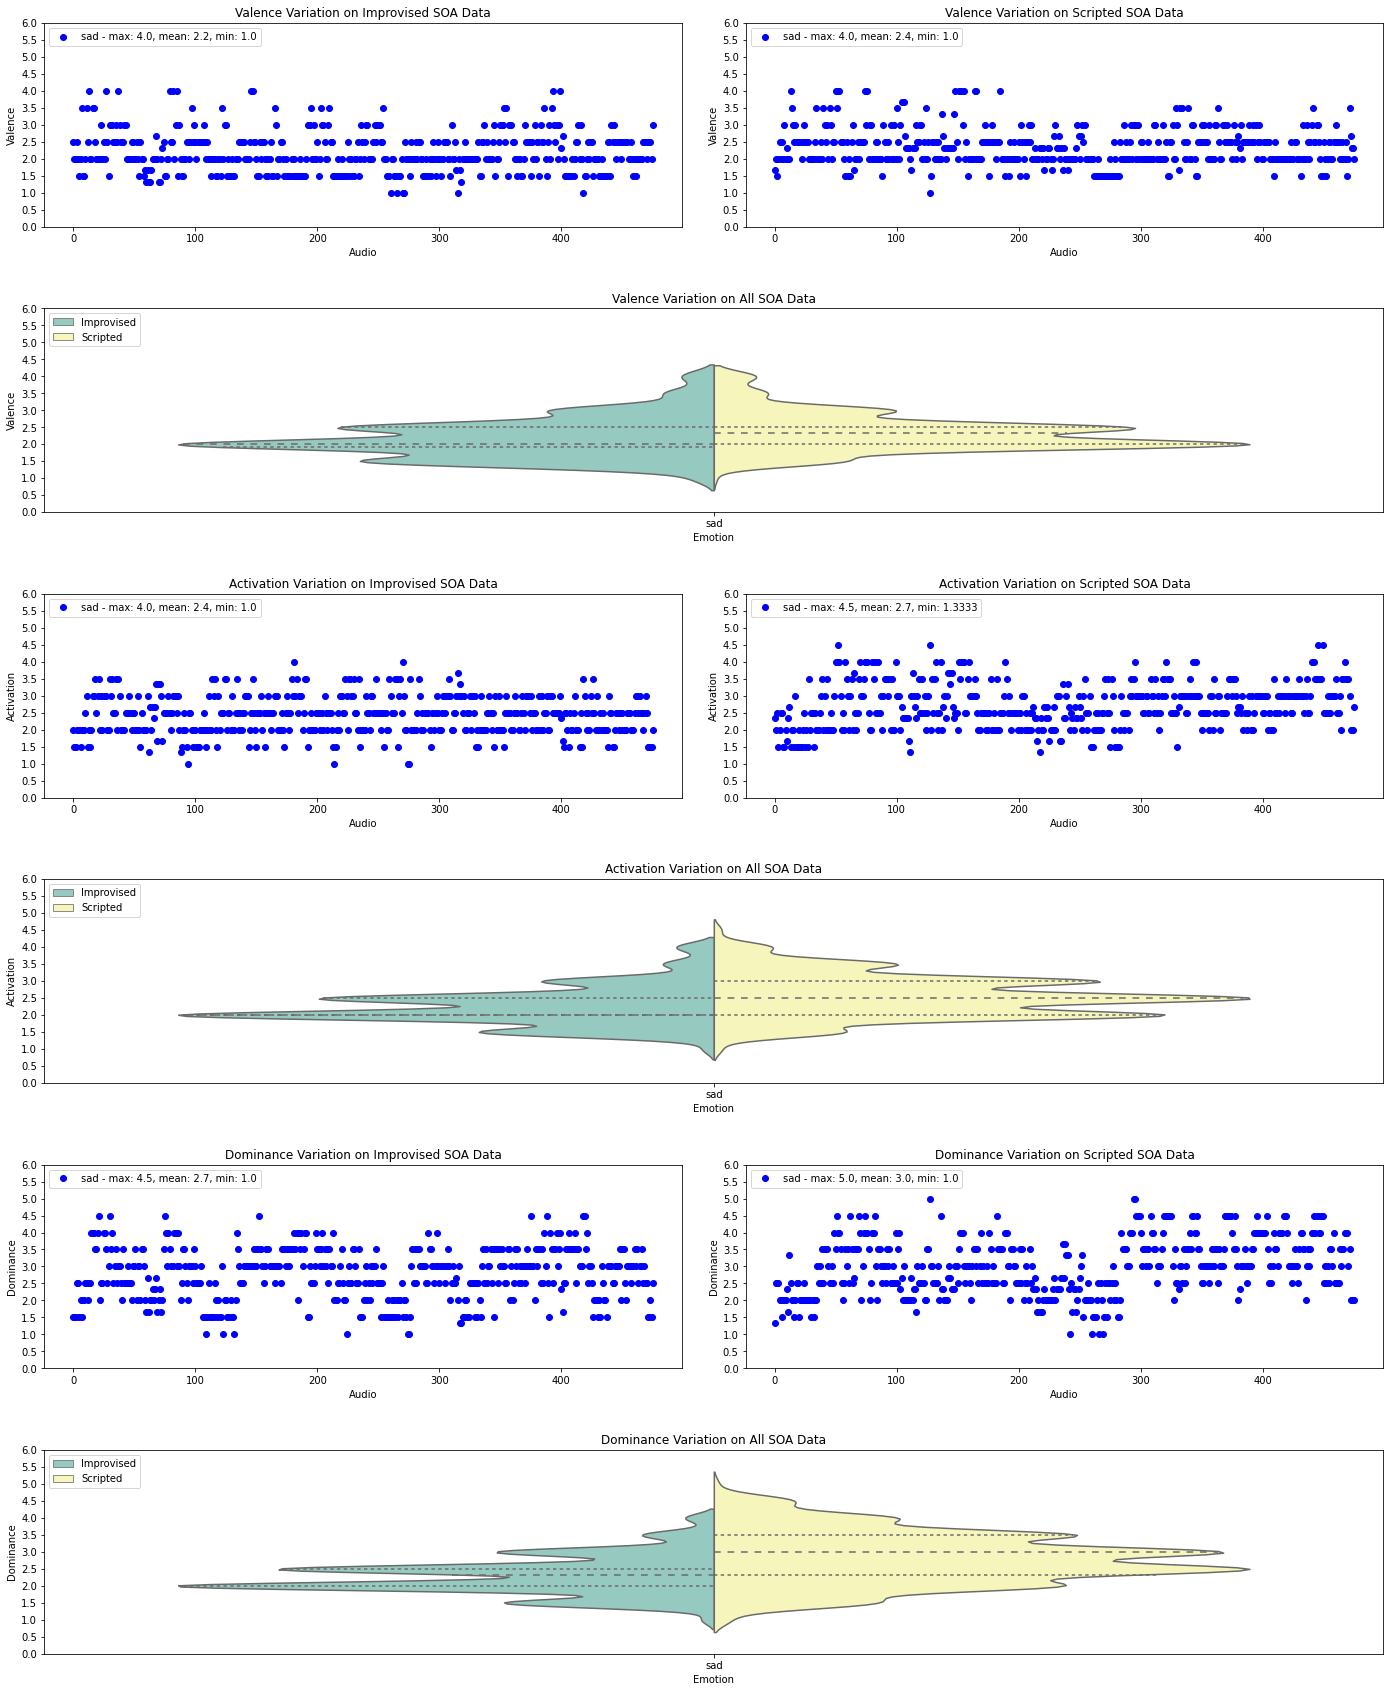

In [20]:
labels_variations(['sad'])

C:\Users\Chico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


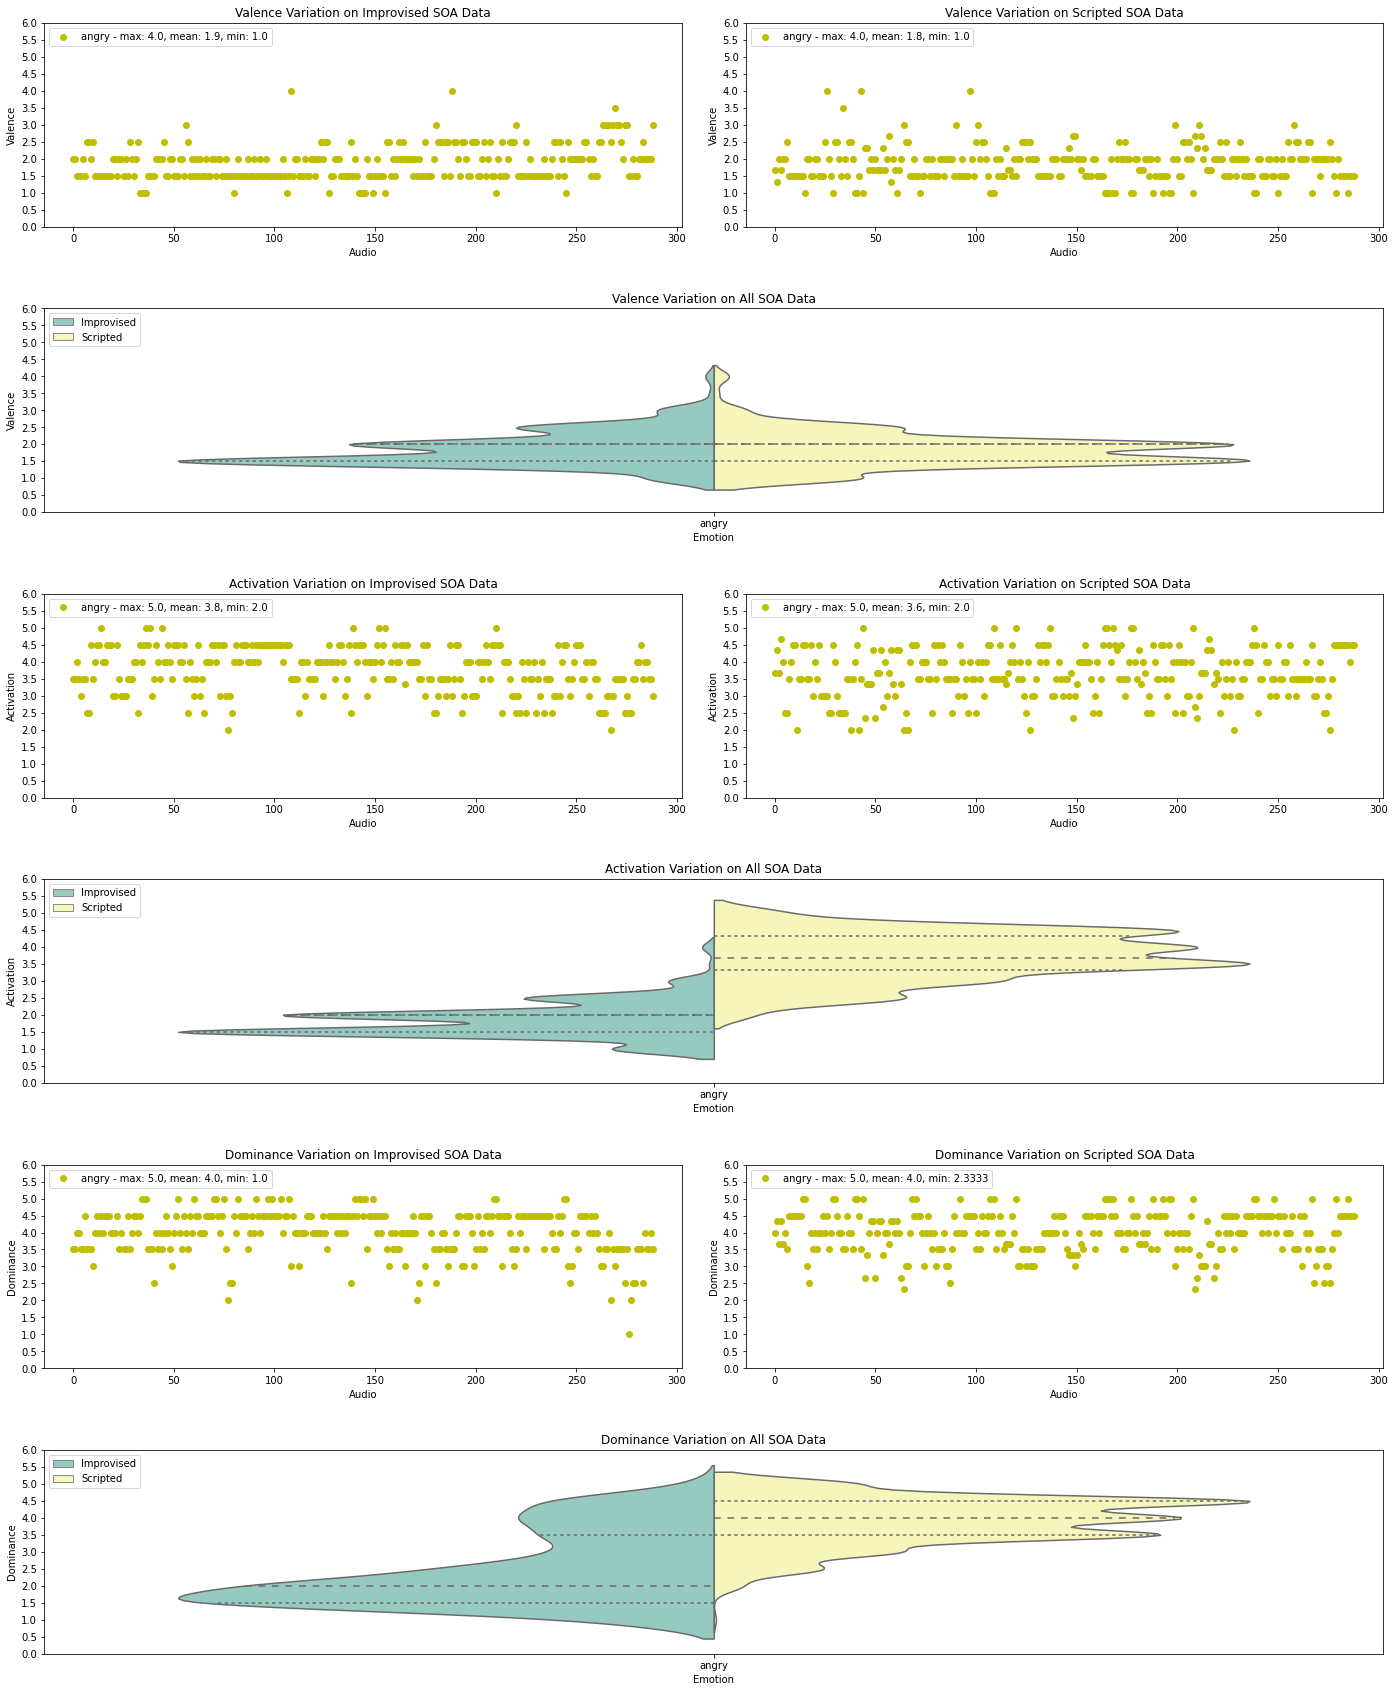

In [21]:
labels_variations(['angry'])

C:\Users\Chico\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


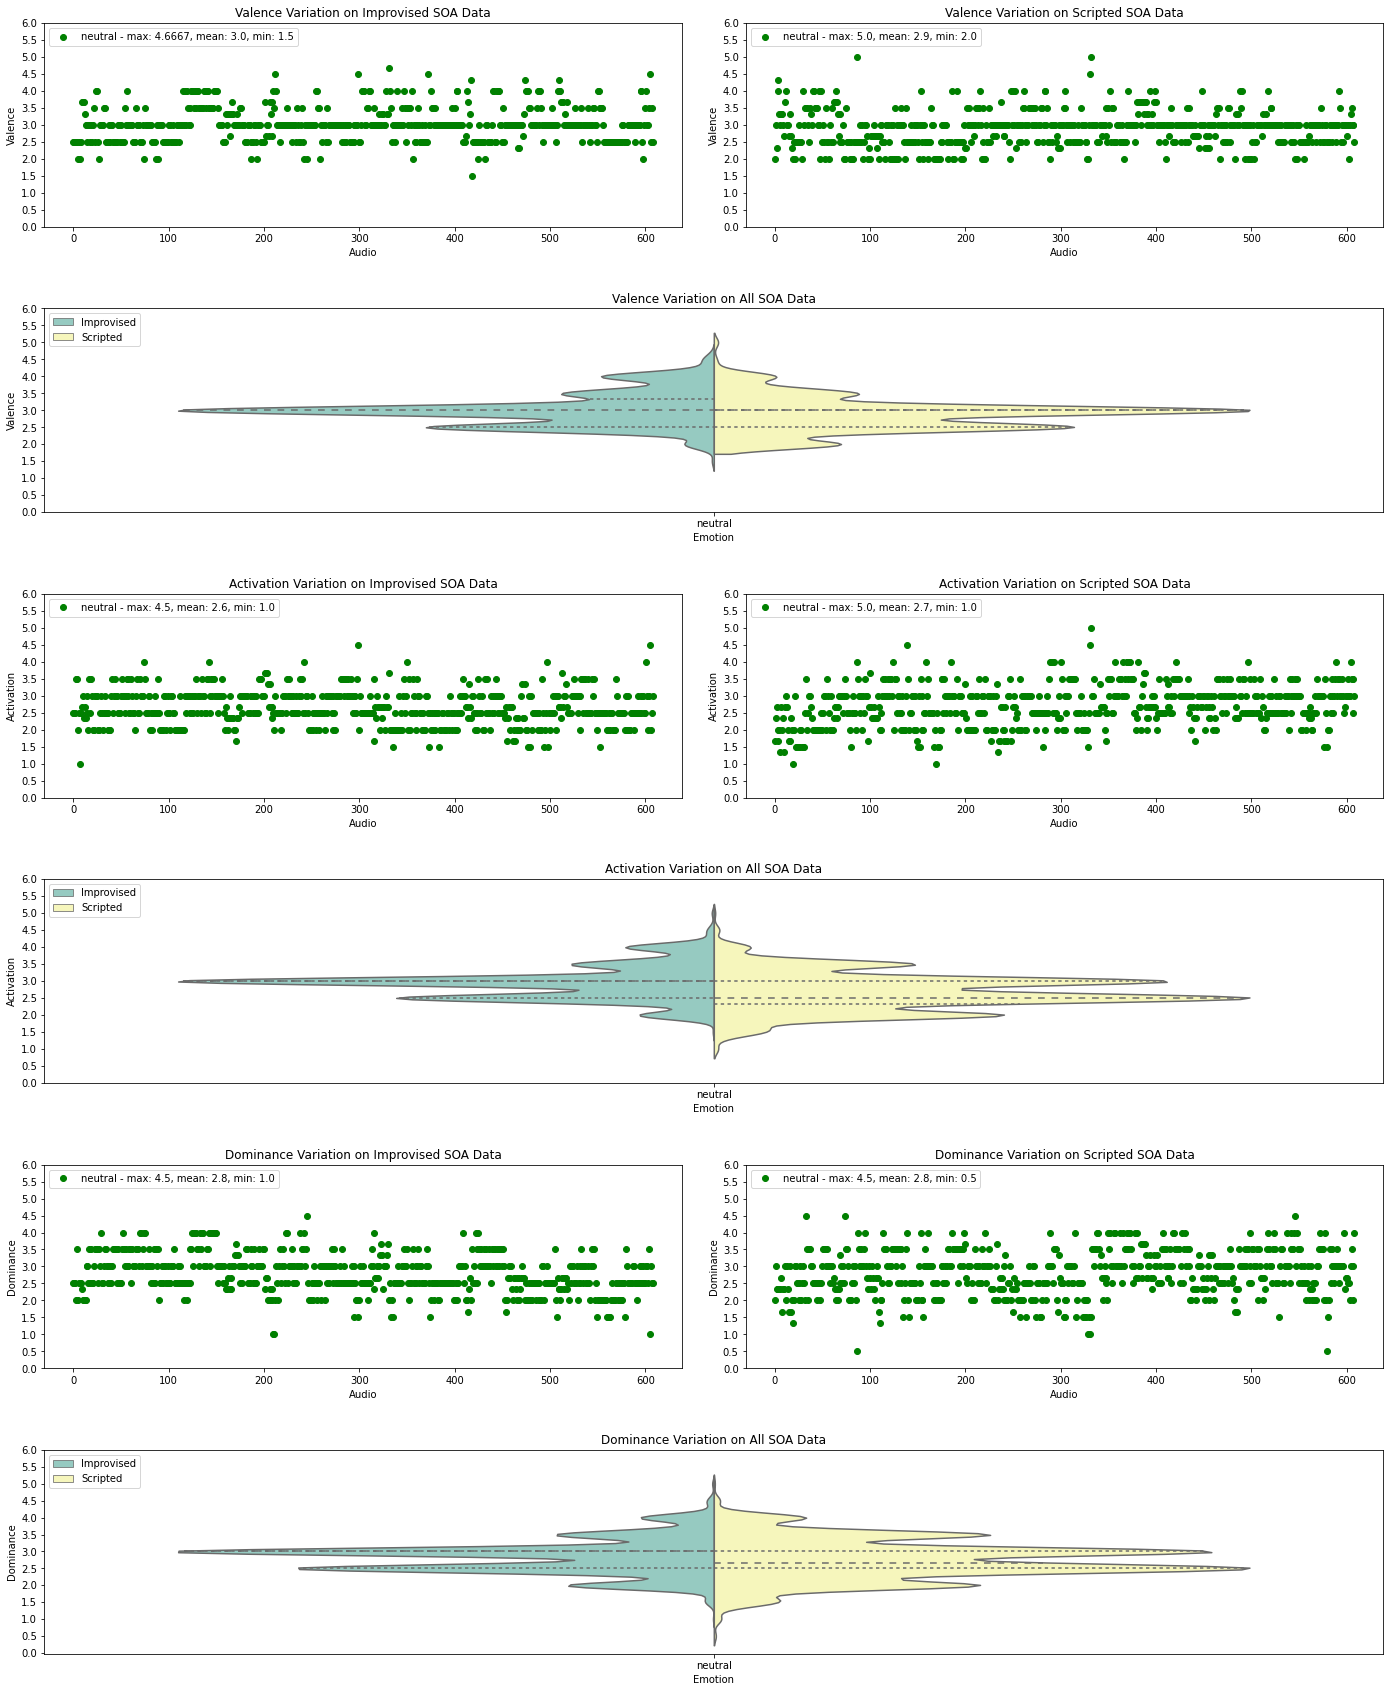

In [22]:
labels_variations(['neutral'])